In [1]:
import datetime 
from twitterscraper.query import query_tweets

def daily_twitter(keyword, m, d):
    for i in range(d+1)[1:]:
        if i != d:
            f = open(f'c:/data/twitter/kor/twitter_{m}m{i}d.txt',mode='w',encoding='utf-8')
            list_of_tweets = query_tweets(keyword,
                                          begindate=datetime.date(2020,m,i),
                                          enddate=datetime.date(2020,m,i+1),
                                          limit = 100)

            for tweet in list_of_tweets:
                f.write(str(tweet.text)+'\n')
            f.close()
        else:
            f = open(f'c:/data/twitter/kor/twitter_{m}m{i}d.txt',mode='w',encoding='utf-8')
            list_of_tweets = query_tweets(keyword,
                                          begindate=datetime.date(2020,m,i),
                                          enddate=datetime.date(2020,m+1,1),
                                          limit = 100)

            for tweet in list_of_tweets:
                f.write(str(tweet.text)+'\n')
            f.close()

INFO: {'User-Agent': 'Mozilla/5.0 (Windows NT 5.2; RW; rv:7.0a1) Gecko/20091211 SeaMonkey/9.23a1pre', 'X-Requested-With': 'XMLHttpRequest'}


In [2]:
daily_twitter('코로나',6,30)

INFO: queries: ['코로나 since:2020-06-01 until:2020-06-02']
INFO: Got 112 tweets (112 new).
INFO: queries: ['코로나 since:2020-06-02 until:2020-06-03']
INFO: Got 115 tweets (115 new).
INFO: queries: ['코로나 since:2020-06-03 until:2020-06-04']
INFO: Got 114 tweets (114 new).
INFO: queries: ['코로나 since:2020-06-04 until:2020-06-05']
INFO: Got 111 tweets (111 new).
INFO: queries: ['코로나 since:2020-06-05 until:2020-06-06']
INFO: Got 111 tweets (111 new).
INFO: queries: ['코로나 since:2020-06-06 until:2020-06-07']
INFO: Got 114 tweets (114 new).
INFO: queries: ['코로나 since:2020-06-07 until:2020-06-08']
INFO: Got 112 tweets (112 new).
INFO: queries: ['코로나 since:2020-06-08 until:2020-06-09']
INFO: Got 113 tweets (113 new).
INFO: queries: ['코로나 since:2020-06-09 until:2020-06-10']
INFO: Got 108 tweets (108 new).
INFO: queries: ['코로나 since:2020-06-10 until:2020-06-11']
INFO: Got 116 tweets (116 new).
INFO: queries: ['코로나 since:2020-06-11 until:2020-06-12']
INFO: Got 114 tweets (114 new).
INFO: queries: ['코로나 

In [3]:
from konlpy.tag import Hannanum
import pandas as pd
def flatten(items): #2차원 리스트를 1차원 리스트로 변환
        flatList=[]
        for elem in items:
            if type(elem) == list: #자료형이 리스트이면
                for e in elem: #개별 원소를 추가
                    flatList.append(e)
            else: #리스트가 아니면 그대로 추가
                flatList.append(elem)
        return flatList

In [4]:
words_choice = ['우한', '중국', '미국', '일본', '유럽', 
                '신천지', '교회', '예배', '기독교',
                '예방', '증상', '백신', '감염',
                '시장', '경제', '지원금', '매출', '물가',
                '인강', '등교', '개학', '인터넷강의', '학교', '유치원']
#우울증, 일상, 포스트코로나, 
#재택근무, 고용, 실업

In [5]:
# 트위터 월별 데이터 2차원 리스트로 변환
from konlpy.tag import Hannanum
from tqdm import tqdm_notebook
temp_re=[]
def temp_re_made(m,d):
    for i in tqdm_notebook(range(d+1)[1:]):
        f=open(f'c:/data/twitter/kor/twitter_{m}m{i}d.txt', encoding='utf-8')
        lines = f.readlines() 
        f.close()

        han=Hannanum() #한나눔 패키지
        temp=[]
        for j in range(len(lines)):
            a=lines[j].strip() #공백,줄바꿈,탭 제거
            b = han.nouns(a)
            c = list(filter(lambda x : x in words_choice, b))
            if len(c) != 0:
                temp.extend(c)
            else:
                pass
        temp_re.append(temp)

In [6]:
temp_re_made(1,31)
temp_re_made(2,29)
temp_re_made(3,31)
temp_re_made(4,30)
temp_re_made(5,31)
temp_re_made(6,30)

In [7]:
len(temp_re)

182

In [8]:
docs = temp_re
vocab = words_choice

In [9]:
from math import log
N=len(docs) #문서의 갯수

# tf - 문서 내에서 단어의 출현 횟수
def tf(t,d):
    return d.count(t)

# df : 특정 단어가 등장한 문서의 수
# idf : df에 반비례하는 수
def idf(t):
    df=0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

# tfidf : tf와 idf를 곱한 값
def tfidf(t,d):
    return tf(t,d) * idf(t)

In [10]:
import pandas as pd
result=[]
for i in range(N):
    result.append([])
    d=docs[i] #i번째 문서
    for j in range(len(vocab)): 
        t=vocab[j]#개별 단어
        result[-1].append(tf(t,d)) #tf 추가 추가

df_tf=pd.DataFrame(result, columns=vocab)

In [11]:
#idf 계산
result=[]
for j in range(len(vocab)):
    t=vocab[j]
    result.append(idf(t))

df_idf=pd.DataFrame(result,index=vocab, columns=['IDF'])

In [12]:
#tfidf 계산- 값이 크면 중요도가 높고 값이 작으면 중요도가 낮은 단어
from tqdm import tqdm_notebook

result=[]
for i in tqdm_notebook(range(N)):
    result.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        result[-1].append(tfidf(t,d))
        
df_tfidf=pd.DataFrame(result, columns=vocab)  

In [13]:
df_tfidf

우한        중국        미국        일본        유럽        신천지        교회  \
0    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
..        ...       ...       ...       ...       ...        ...       ...   
177  1.499319  1.067871  1.363638  0.000000  0.000000   0.000000  2.219324   
178  1.499319  0.213574  0.000000  0.000000  0.000000   0.550046  0.000000   
179  0.000000  0.000000  0.227273  0.000000  0.000000  15.401297  3.328986   
180  0.000000  0.854296  0.000000  0.830259  1.215023   3.300278  1.109662   
181  0.000000  0.427148  0.909092  0.000000  1.215023   0.550046  0.000000   

      예배  기독교        예방  ...        경제  지원금        매출       물가   인강        등교  \
0    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
1    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
2    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
3    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
4    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
..   ...  ...       ...  ...       ...  ...       ...      ...  ...       ...   
177  0.0  0.0  1.197673  ...  0.608887  0.0  0.000000  0.00000  0.0  0.000000   
178  0.0  0.0  3.593019  ...  0.608887  0.0  0.000000  0.00000  0.0  0.000000   
179  0.0  0.0  1.197673  ...  1.826661  0.0  3.673422  4.51086  0.0  0.000000   
180  0.0  0.0  1.197673  ...  0.608887  0.0  0.000000  0.00000  0.0  2.112964   
181  0.0  0.0  0.598837  ...  1.217774  0.0  0.000000  0.00000  0.0  0.000000   

           개학  인터넷강의        학교  유치원  
0    0.000000    0.0  0.000000  0.0  
1    0.000000    0.0  0.000000  0.0  
2    0.000000    0.0  0.000000  0.0  
3    0.000000    0.0  0.000000  0.0  
4    0.000000    0.0  0.000000  0.0  
..        ...    ...       ...  ...  
177  0.000000    0.0  0.913547  0.0  
178  0.000000    0.0  0.913547  0.0  
179  0.000000    0.0  2.740642  0.0  
180  0.000000    0.0  3.654189  0.0  
181  1.375365    0.0  0.000000  0.0  

[182 rows x 24 columns]

In [16]:
df_summary = pd.DataFrame(df_tfidf[['우한','중국','미국','일본','유럽']].sum(axis=1),columns=['국제'])
df_summary['종교'] = pd.DataFrame(df_tfidf[['신천지', '교회', '예배', '기독교']].sum(axis=1))
df_summary['의료'] = pd.DataFrame(df_tfidf[['예방', '증상', '백신', '감염']].sum(axis=1))
df_summary['시장'] = pd.DataFrame(df_tfidf[['시장', '경제', '지원금', '매출', '물가']].sum(axis=1))
df_summary['교육'] = pd.DataFrame(df_tfidf[['인강', '등교', '개학', '인터넷강의', '학교', '유치원']].sum(axis=1))
df_summary = df_summary.set_index(pd.date_range('2020-1-1',periods=182))
df_summary

국제         종교        의료         시장        교육
2020-01-01  0.000000   0.000000  0.000000   0.000000  0.000000
2020-01-02  0.000000   0.000000  0.000000   0.000000  0.000000
2020-01-03  0.000000   0.000000  0.000000   0.000000  0.000000
2020-01-04  0.000000   0.000000  0.000000   0.000000  0.000000
2020-01-05  0.000000   0.000000  0.000000   0.000000  0.000000
...              ...        ...       ...        ...       ...
2020-06-26  3.930827   2.219324  4.292738   0.608887  0.913547
2020-06-27  1.712893   0.550046  5.236979   0.608887  0.913547
2020-06-28  0.227273  18.730284  1.571127  13.339928  2.740642
2020-06-29  2.899578   4.409940  7.207204   1.718549  5.767153
2020-06-30  2.551263   0.550046  2.354451   5.656422  1.375365

[182 rows x 5 columns]

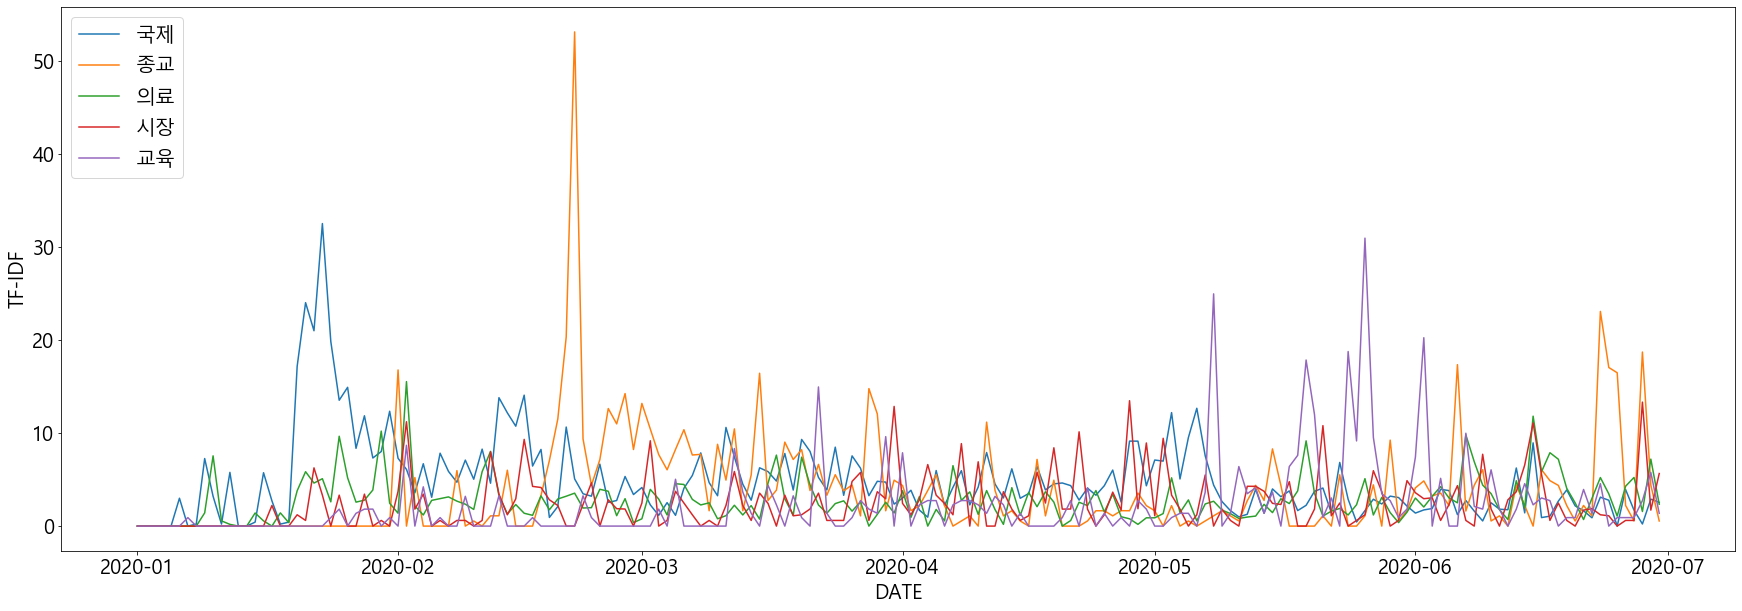

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(df_summary)
plt.xlabel('DATE')
plt.ylabel('TF-IDF')
plt.legend(df_summary.columns, loc='upper left')
plt.show()

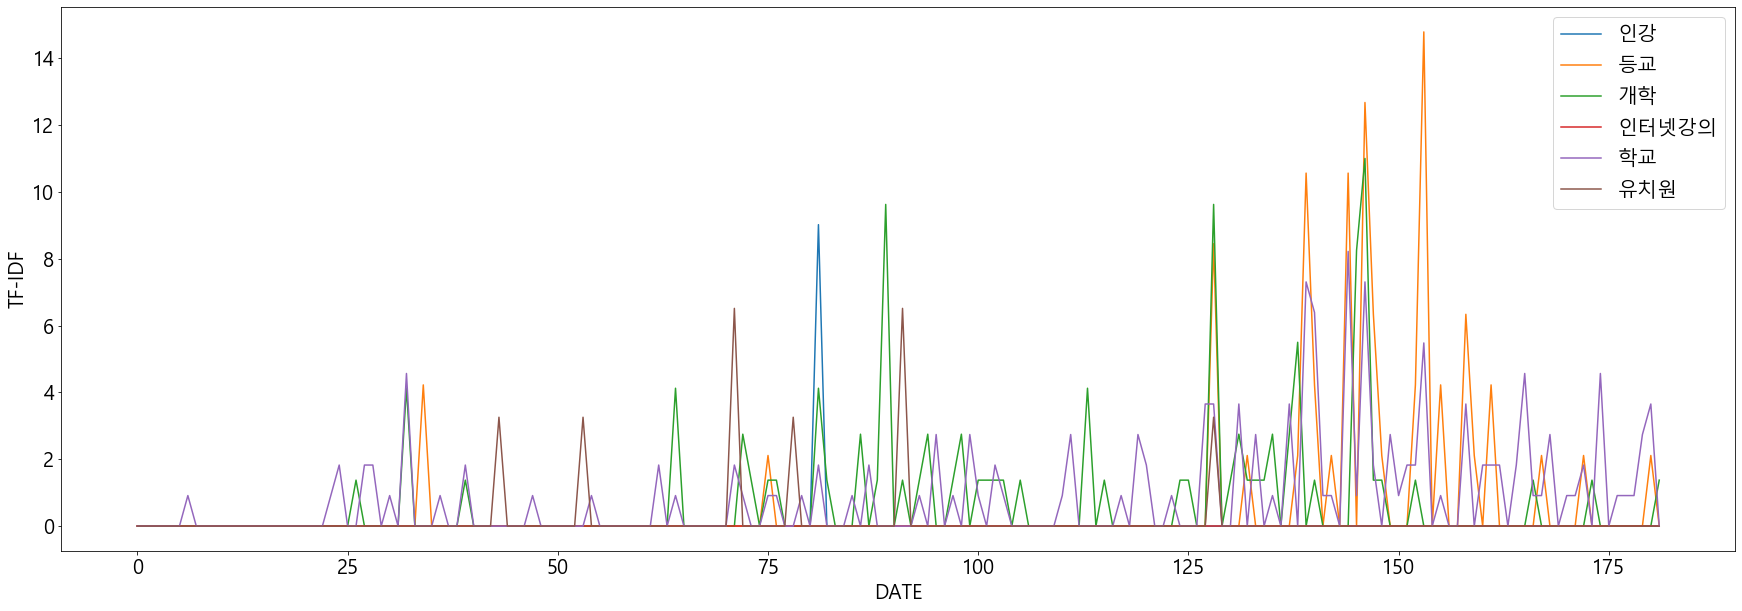

In [40]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(df_tfidf[['인강', '등교', '개학', '인터넷강의', '학교', '유치원']])
plt.xlabel('DATE')
plt.ylabel('TF-IDF')
plt.legend(['인강', '등교', '개학', '인터넷강의', '학교', '유치원'], loc='upper right')
plt.show()

In [36]:
df_tfidf

우한        중국        미국        일본        유럽        신천지        교회  \
0    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
..        ...       ...       ...       ...       ...        ...       ...   
177  1.499319  1.067871  1.363638  0.000000  0.000000   0.000000  2.219324   
178  1.499319  0.213574  0.000000  0.000000  0.000000   0.550046  0.000000   
179  0.000000  0.000000  0.227273  0.000000  0.000000  15.401297  3.328986   
180  0.000000  0.854296  0.000000  0.830259  1.215023   3.300278  1.109662   
181  0.000000  0.427148  0.909092  0.000000  1.215023   0.550046  0.000000   

      예배  기독교        예방  ...        경제  지원금        매출       물가   인강        등교  \
0    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
1    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
2    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
3    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
4    0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.00000  0.0  0.000000   
..   ...  ...       ...  ...       ...  ...       ...      ...  ...       ...   
177  0.0  0.0  1.197673  ...  0.608887  0.0  0.000000  0.00000  0.0  0.000000   
178  0.0  0.0  3.593019  ...  0.608887  0.0  0.000000  0.00000  0.0  0.000000   
179  0.0  0.0  1.197673  ...  1.826661  0.0  3.673422  4.51086  0.0  0.000000   
180  0.0  0.0  1.197673  ...  0.608887  0.0  0.000000  0.00000  0.0  2.112964   
181  0.0  0.0  0.598837  ...  1.217774  0.0  0.000000  0.00000  0.0  0.000000   

           개학  인터넷강의        학교  유치원  
0    0.000000    0.0  0.000000  0.0  
1    0.000000    0.0  0.000000  0.0  
2    0.000000    0.0  0.000000  0.0  
3    0.000000    0.0  0.000000  0.0  
4    0.000000    0.0  0.000000  0.0  
..        ...    ...       ...  ...  
177  0.000000    0.0  0.913547  0.0  
178  0.000000    0.0  0.913547  0.0  
179  0.000000    0.0  2.740642  0.0  
180  0.000000    0.0  3.654189  0.0  
181  1.375365    0.0  0.000000  0.0  

[182 rows x 24 columns]

In [18]:
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [19]:
df_forcast1 = pd.DataFrame(df_summary[['국제']])
df_forcast1.reset_index(inplace=True)
df_forcast1.columns = ['ds','y']

In [20]:
df_forcast2 = pd.DataFrame(df_summary[['종교']])
df_forcast2.reset_index(inplace=True)
df_forcast2.columns = ['ds','y']

In [21]:
df_forcast3 = pd.DataFrame(df_summary[['의료']])
df_forcast3.reset_index(inplace=True)
df_forcast3.columns = ['ds','y']

In [22]:
df_forcast4 = pd.DataFrame(df_summary[['시장']])
df_forcast4.reset_index(inplace=True)
df_forcast4.columns = ['ds','y']

In [23]:
df_forcast5 = pd.DataFrame(df_summary[['교육']])
df_forcast5.reset_index(inplace=True)
df_forcast5.columns = ['ds','y']

In [24]:
def future_graph(df):
    #Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
    m = Prophet(
        changepoint_prior_scale=0.5, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
        changepoint_range=0.9, # 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
    )
    m.fit(df)
    #미래 dataframe
    future = m.make_future_dataframe(periods=30)#현재까지의 날짜로부터 30일의 미래
    forecast = m.predict(future)
    fig = plot_plotly(m, forecast)
    py.iplot(fig)
    #점이 없이 선만 있는 부분이 예측된 미래

In [25]:
future_graph(df_forcast1)
#국제

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future_graph(df_forcast2)
#종교

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future_graph(df_forcast3)
#의료

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_graph(df_forcast4)
#시장

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future_graph(df_forcast5)
#교육

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
